## **EMAIL SPAM DETECTION WITH MACHINE LEARNING**
### Task 4 - Oasis Infobyte Internship
- SANTHA LAKSHMI S

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [43]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [44]:
# Load the dataset
file_path = "/content/spam.csv"
data = pd.read_csv(file_path, encoding='latin-1')

In [45]:
# Preprocess the text data
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and apply stemming
    tokens = [ps.stem(word) for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)

data['v2'] = data['v2'].apply(preprocess_text)

In [46]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(data['v2'], data['v1'], test_size=0.2, random_state=42)

# Feature Extraction
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train the Model
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

# Make Predictions
predictions = model.predict(X_test_vectorized)

In [47]:
# Evaluate the Model
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.979372197309417


In [48]:
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Confusion Matrix:
 [[959   6]
 [ 17 133]]


In [49]:
print("Classification Report:\n", classification_report(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

         ham       0.98      0.99      0.99       965
        spam       0.96      0.89      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [50]:
# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [51]:
# ROC Curve
def plot_roc_curve(y_true, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [52]:
# Make Predictions with Probabilities
predictions_prob = model.predict_proba(X_test_vectorized)

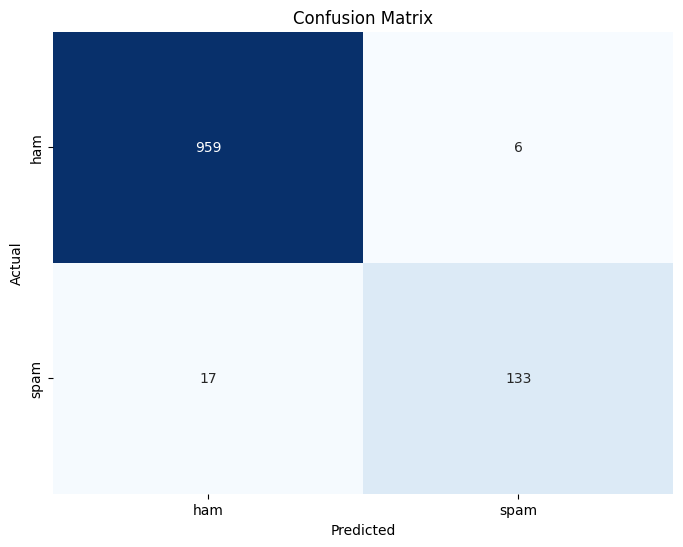

In [53]:
# Visualize Confusion Matrix
plot_confusion_matrix(y_test, predictions)

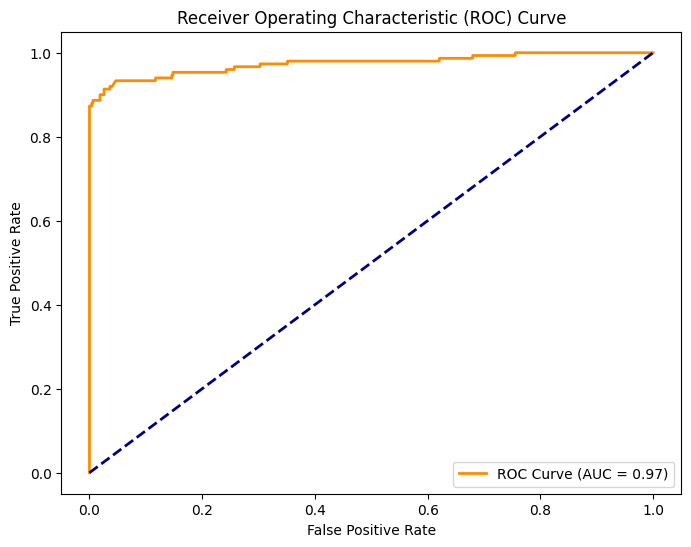

In [54]:
# Visualize ROC Curve
plot_roc_curve(y_test.map({'ham': 0, 'spam': 1}), predictions_prob)